In [1]:
import torch
import torch.nn as nn
from dataloader import DataLoader
import numpy as np
import datetime
import matplotlib.pylab as plt

# Data

In [2]:
dl = DataLoader('~/.datasets/Han.Xiao/fashion-mnist/')
train_img,train_labels = dl.get_data(kind='train')
test_img,test_labels = dl.get_data(kind='t10k')

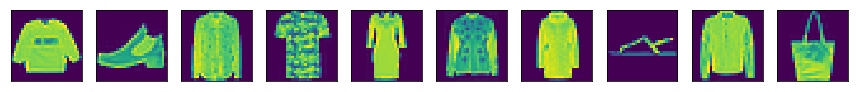

[['pullover'],
 ['ankle boot'],
 ['shirt'],
 ['t-shirt'],
 ['dress,'],
 ['coat'],
 ['coat'],
 ['sandal'],
 ['coat'],
 ['bag']]

In [3]:
DataLoader.show_images(train_img[0:10])
DataLoader.get_labels(train_labels[0:10])

In [4]:
train_samples, in_features = train_img.shape
out_classes = 10

## PyTorch Data

In [5]:
train_img = torch.from_numpy(train_img).float()
train_lab = torch.from_numpy(train_labels).float().view(-1,1)
test_img = torch.from_numpy(test_img).float()
test_lab = torch.from_numpy(test_labels).float().view(-1, 1)

In [6]:
# 归一化
train_img_nd = train_img / 255
test_img_nd = test_img / 255

train_data = torch.cat((train_img_nd, train_lab), 1)
test_data = torch.cat((test_img_nd, test_lab), 1)

In [7]:
def data_iter(batch_size=100, kind='train'):
    data_sets = train_data if kind=='train' else test_data
    return iter(torch.split(data_sets, batch_size))

In [8]:
def accuracy(y_softmax, y):
    _, y_pred = torch.max(y_softmax, 1, keepdim=True)
    y = y.view(-1,1)
    accu = torch.sum(y_pred==y).item()
    return accu

# Model
$$\boldsymbol{\hat y} = net({\boldsymbol x}) = softmax({\boldsymbol{x}}\ {W} + {\boldsymbol{b}})$$

In [9]:
class LogisticRegression(nn.Module):
    def __init__(self, in_features, out_classes):
        super().__init__()
        self.linear = nn.Linear(in_features, out_classes)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, X):
        out = self.linear(X)
        out = self.softmax(out)
        return out

In [20]:
model = LogisticRegression(in_features, out_classes)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

# Train

In [21]:
epochs = 200
t1 = datetime.datetime.now()

for e in range(epochs):
    train_loss = 0
    train_accu = 0
    
    for data in data_iter():
        X = data[:, :-1]
        y = data[:,-1].long()
        
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        train_accu += accuracy(y_pred, y)
    
    train_loss /= train_samples
    train_accu /= train_samples
    
    print("epoch[{}] loss: {:.4f}, accuracy:{:.4f}%".format(e+1, train_loss, train_accu*100))
    
print("runing time: {}".format(datetime.datetime.now()-t1))

epoch[1] loss: 0.0175, accuracy:72.9150%
epoch[2] loss: 0.0168, accuracy:79.8317%
epoch[3] loss: 0.0167, accuracy:80.5800%
epoch[4] loss: 0.0166, accuracy:81.0383%
epoch[5] loss: 0.0166, accuracy:81.3100%
epoch[6] loss: 0.0164, accuracy:83.1550%
epoch[7] loss: 0.0163, accuracy:84.6617%
epoch[8] loss: 0.0162, accuracy:84.9783%
epoch[9] loss: 0.0162, accuracy:85.2267%
epoch[10] loss: 0.0162, accuracy:85.4133%
epoch[11] loss: 0.0161, accuracy:85.5450%
epoch[12] loss: 0.0161, accuracy:85.7267%
epoch[13] loss: 0.0161, accuracy:85.8467%
epoch[14] loss: 0.0161, accuracy:85.9967%
epoch[15] loss: 0.0161, accuracy:86.0383%
epoch[16] loss: 0.0161, accuracy:86.1383%
epoch[17] loss: 0.0161, accuracy:86.2067%
epoch[18] loss: 0.0161, accuracy:86.2767%
epoch[19] loss: 0.0161, accuracy:86.3067%
epoch[20] loss: 0.0161, accuracy:86.3933%
epoch[21] loss: 0.0160, accuracy:86.4583%
epoch[22] loss: 0.0160, accuracy:86.5100%
epoch[23] loss: 0.0160, accuracy:86.5567%
epoch[24] loss: 0.0160, accuracy:86.6250%
e

epoch[195] loss: 0.0158, accuracy:89.0317%
epoch[196] loss: 0.0158, accuracy:89.0350%
epoch[197] loss: 0.0158, accuracy:89.0383%
epoch[198] loss: 0.0158, accuracy:89.0400%
epoch[199] loss: 0.0158, accuracy:89.0467%
epoch[200] loss: 0.0158, accuracy:89.0550%
runing time: 0:00:34.500852


# Test

In [12]:
model.eval()

y_pred = model(test_img)
y = test_lab.long()
accu = accuracy(y_pred, y)

print("accuracy:{:.4f}%".format(accu/len(test_labels)*100))

accuracy:79.4100%


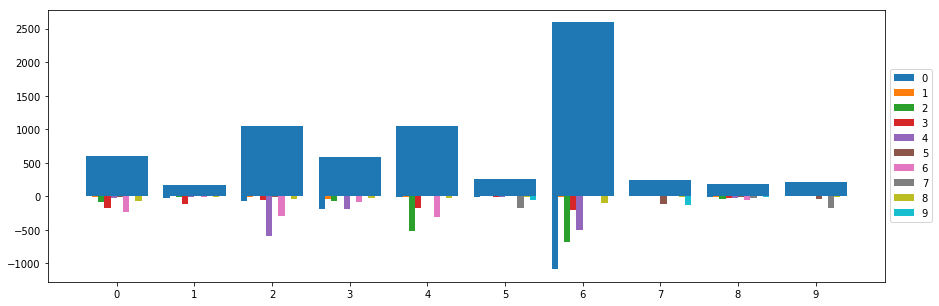

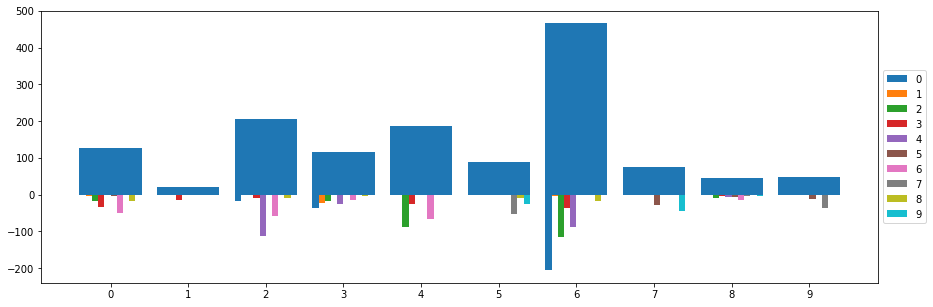

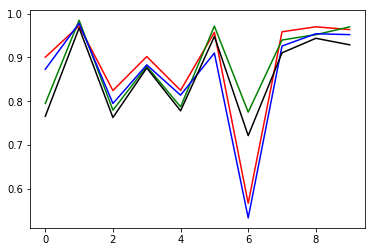

In [13]:
from statiser import Statistics
y = train_lab.detach().numpy()
train_statistics = Statistics(model(train_img_nd).detach().numpy().argmax(axis=1), 
                              y.reshape(len(y),))

y = test_lab.detach().numpy()
test_statistics = Statistics(model(test_img_nd).detach().numpy().argmax(axis=1), 
                             y.reshape(len(y),))

train_statistics.show()
test_statistics.show()
plt.plot(range(10),train_statistics.Recall(),'r')
plt.plot(range(10),train_statistics.Precision(),'g')
plt.plot(range(10),test_statistics.Recall(),'b')
plt.plot(range(10),test_statistics.Precision(),'k')
plt.show()